In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans


In [6]:
ramen_data = pd.read_csv("ramen-ratings.csv", dtype={"Stars": str})
ramen_data.head()


,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


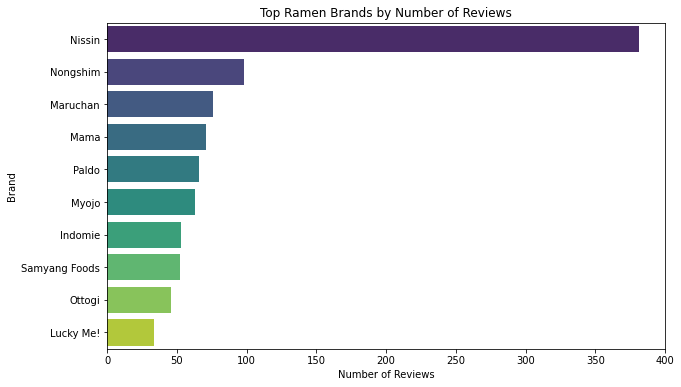

In [7]:
top_brands = ramen_data["Brand"].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_brands.values, y=top_brands.index, palette="viridis")
plt.xlabel("Number of Reviews")
plt.ylabel("Brand")
plt.title("Top Ramen Brands by Number of Reviews")
plt.show()


In [14]:
# Load the data
ramen_data = pd.read_csv("ramen-ratings.csv")

# Drop rows with missing values in the 'Stars' column
ramen_data = ramen_data.dropna(subset=['Stars'])

# Convert 'Stars' column to numeric
ramen_data['Stars'] = pd.to_numeric(ramen_data['Stars'], errors='coerce')

In [15]:
# Drop rows with missing values in the 'Stars' column
ramen_data = ramen_data.dropna(subset=['Stars'])

# Convert 'Stars' column to numeric
ramen_data['Stars'] = pd.to_numeric(ramen_data['Stars'], errors='coerce')

In [16]:
# Select features for clustering
features = ['Stars']
X = ramen_data[features]

In [17]:
from sklearn.preprocessing import StandardScaler

# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

In [21]:
# Specify the number of clusters
n_clusters = 5

# Initialize K-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit the model to the normalized data
kmeans.fit(X_normalized)

# Get cluster labels
cluster_labels = kmeans.labels_

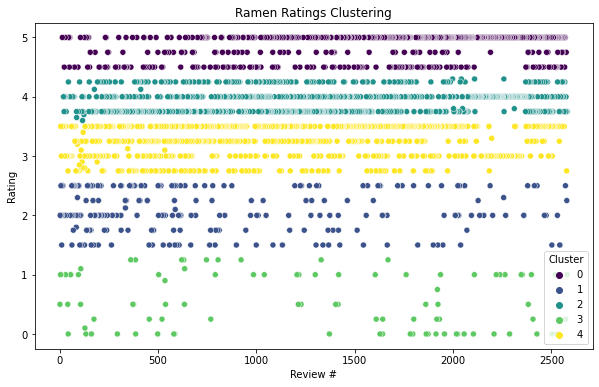

In [22]:
# Add cluster labels to the DataFrame
ramen_data['Cluster'] = cluster_labels

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ramen_data, x='Review #', y='Stars', hue='Cluster', palette='viridis')
plt.xlabel('Review #')
plt.ylabel('Rating')
plt.title('Ramen Ratings Clustering')
plt.legend(title='Cluster')
plt.show()